In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('spotify.csv')

In [101]:
# Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [102]:
df.duplicated().sum()

27

In [104]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

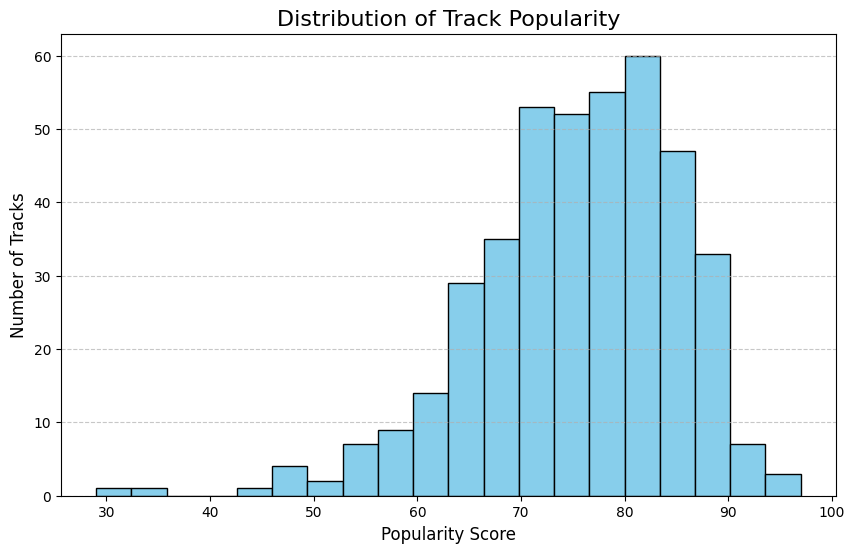

In [113]:
# Q2. # Q2.  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

# Extract the 'Popularity' column for visualization
popularity_data = df['Popularity']

# Create a histogram to show the distribution of popularity scores
plt.figure(figsize=(10, 6))
plt.hist(popularity_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


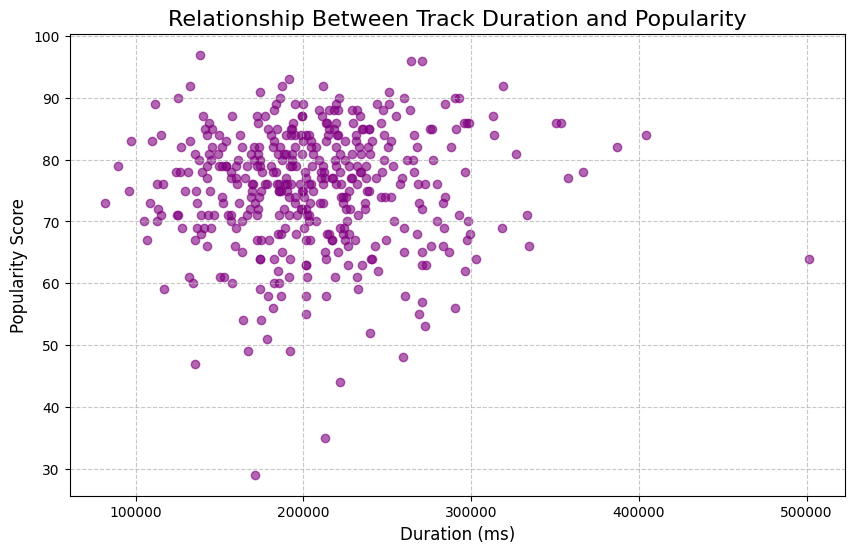

In [115]:
# Q3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

# Extract 'Popularity' and 'Duration (ms)' columns for analysis
popularity = df['Popularity']
duration = df['Duration (ms)']

# Create a scatter plot to visualize the relationship between popularity and duration
plt.figure(figsize=(10, 6))
plt.scatter(duration, popularity, alpha=0.6, color='purple')
plt.title('Relationship Between Track Duration and Popularity', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=12)
plt.ylabel('Popularity Score', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()


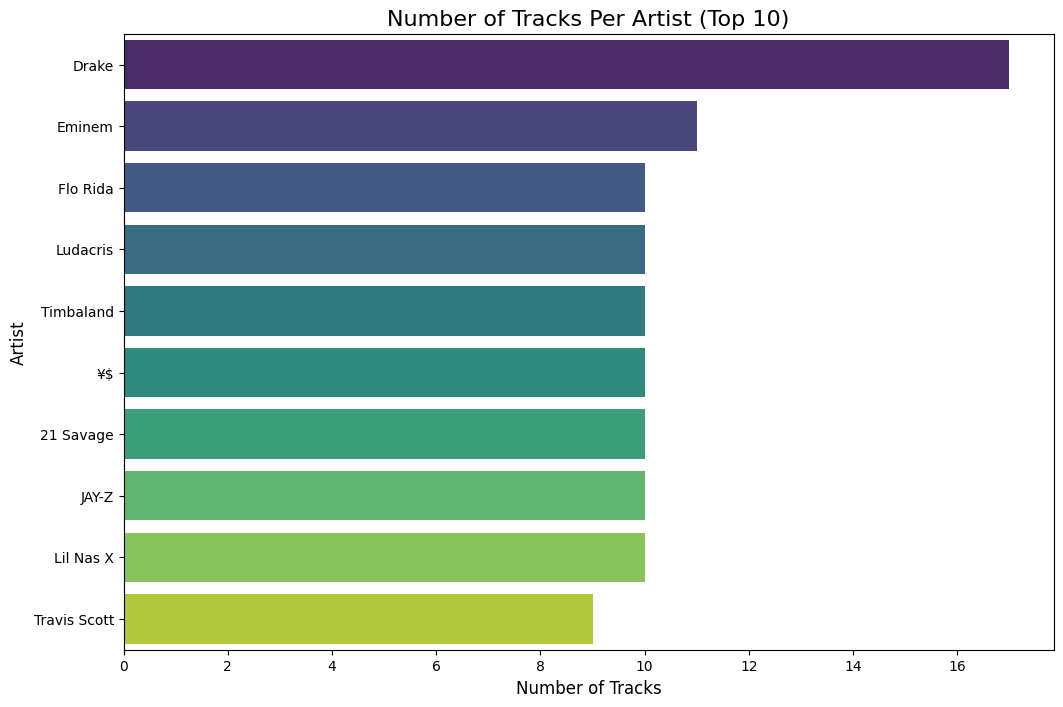

('Drake', 17)

In [118]:
# Q4.  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

import seaborn as sns

# Count the number of tracks per artist
artist_counts = df['Artist'].value_counts()

# Create a countplot to visualize the number of tracks per artist
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Artist'], order=artist_counts.index[:10], palette='viridis')
plt.title('Number of Tracks Per Artist (Top 10)', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.show()

# Identify the artist with the highest number of tracks
top_artist = artist_counts.idxmax()
top_artist_count = artist_counts.max()

top_artist, top_artist_count


In [119]:
# Q5.  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]

least_popular_tracks


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [121]:
# Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

# Calculate the average popularity for each artist
average_popularity_per_artist = df.groupby('Artist')['Popularity'].mean()

# Find the top 5 artists with the highest average popularity
top_5_artists_by_avg_popularity = average_popularity_per_artist.nlargest(5)

top_5_artists_by_avg_popularity


,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


In [122]:
# Q7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

# Find the top 5 most popular artists based on the total number of tracks in the dataset
top_5_artists = df['Artist'].value_counts().head(5).index

# Get the most popular track for each of these artists
most_popular_tracks_by_artist = df.loc[df.groupby('Artist')['Popularity'].idxmax()]
top_5_most_popular_tracks = most_popular_tracks_by_artist[most_popular_tracks_by_artist['Artist'].isin(top_5_artists)][['Artist', 'Track Name', 'Popularity']]

top_5_most_popular_tracks


,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
300,Flo Rida,Low (feat. T-Pain),84
371,Ludacris,My Chick Bad,67
380,Timbaland,The Way I Are,85


<Figure size 1200x800 with 0 Axes>

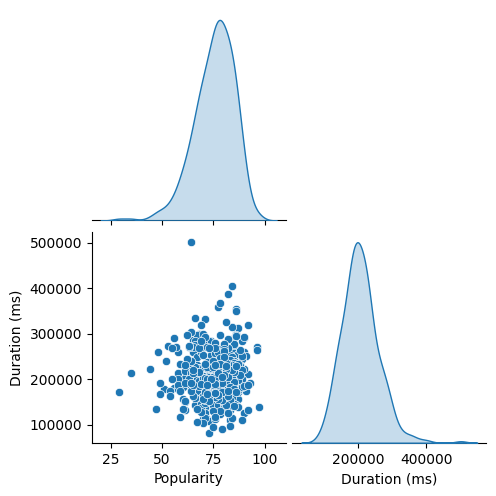

In [124]:
# Q8.  Visualize relationships between multiple numerical variables simultaneously using a pair plot

# Select numerical columns for the pair plot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a pair plot to visualize relationships between numerical variables
plt.figure(figsize=(12, 8))
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True, palette='coolwarm')
plt.show()


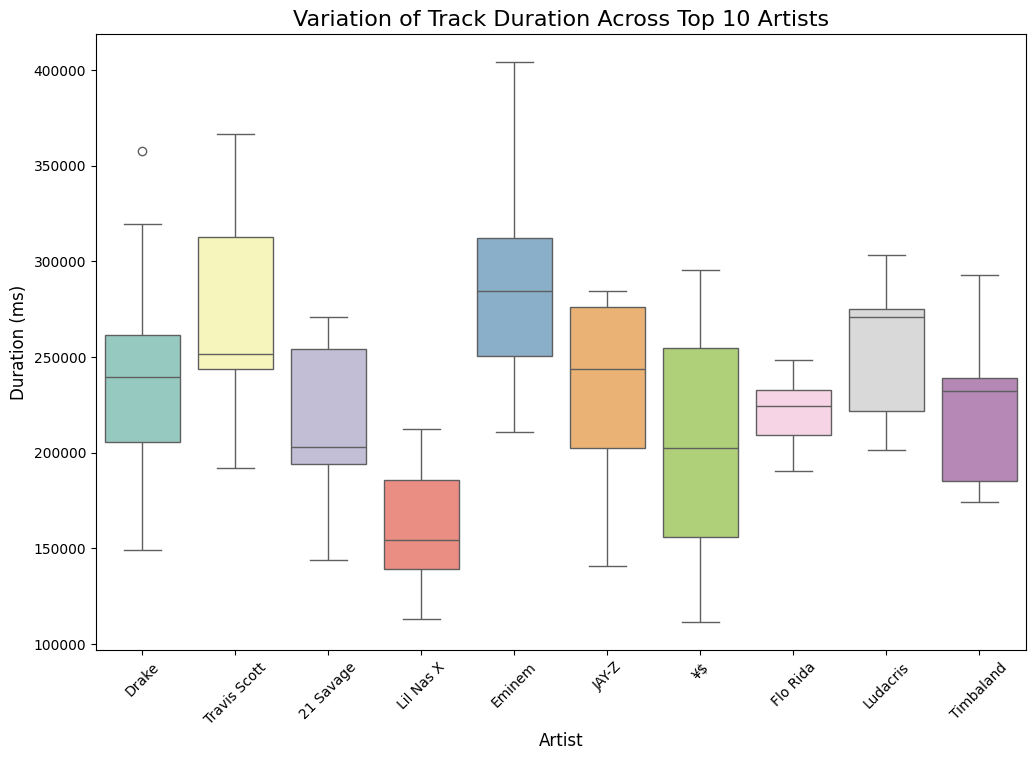

In [125]:
# Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

# Create a box plot to visualize the variation of track duration across different artists
plt.figure(figsize=(12, 8))
top_artists = df['Artist'].value_counts().head(10).index  # Select top 10 artists by track count
sns.boxplot(data=df[df['Artist'].isin(top_artists)],
            x='Artist', y='Duration (ms)', palette='Set3')
plt.title('Variation of Track Duration Across Top 10 Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Duration (ms)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


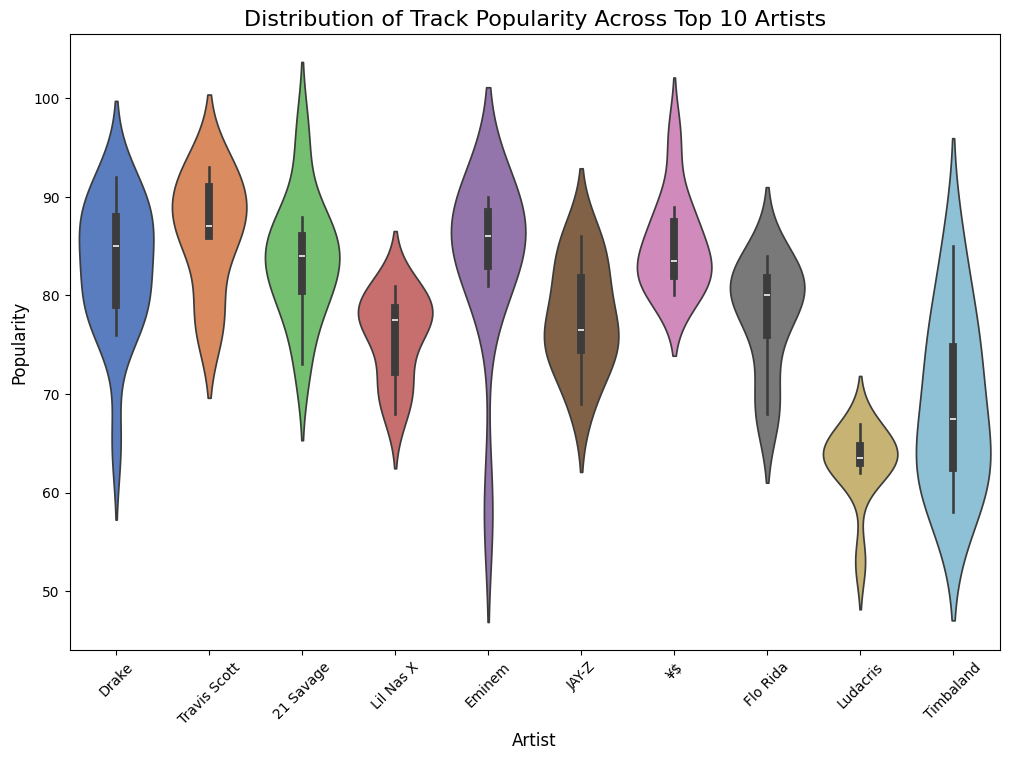

In [126]:
# Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

# Create a violin plot to visualize the distribution of track popularity for different artists
plt.figure(figsize=(12, 8))
sns.violinplot(data=df[df['Artist'].isin(top_artists)],
               x='Artist', y='Popularity', palette='muted', scale='width')
plt.title('Distribution of Track Popularity Across Top 10 Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.show()
